In [2]:
import polars as pl
import pandas as pd
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance
from sentence_transformers import SentenceTransformer

In [2]:
# df = pl.read_csv('data/courses_dataset.csv', separator=';').drop_nulls(['text'])
# docs = list(df['text'])

In [25]:
df = pd.read_csv('data/otzyvus.csv', sep=";", index_col=False, low_memory=False)
df.head()

/tmp/ipykernel_107350/1904371169.py:1: ParserWarning:

Length of header or names does not match length of data. This leads to a loss of data with index_col=False.



,id,created_at,updated_at,deleted_at,text,unfiltered_text,period,teacher_practice,teacher_lector,score_usefulness,...,score_complexity,count_emotional_negative,count_emotional_neutral,count_emotional_positive,is_anonymous,user_id,elective_id,verified_at,elective,user
0,1,2023-04-14T09:29:25.000000Z,2023-04-14T09:38:50.000000Z,2023-04-14T09:38:50.000000Z,NaN,NaN,2023 весна,NaN,NaN,4,...,5,NaN,NaN,NaN,0,1,29,2023-04-14T09:29:25.000000Z,Археология компьютерных игр,2020.0
1,2,2023-04-14T09:29:57.000000Z,2023-05-01T11:53:29.000000Z,2023-05-01T11:53:29.000000Z,NaN,NaN,2023 весна,Григоришин Сергей Викторович,Григоришин Сергей Викторович,3,...,4,NaN,NaN,NaN,1,1,407,2023-04-30T08:18:55.000000Z,Философия кино,2020.0
2,3,2022-11-19T12:54:15.000000Z,NaN,NaN,"Был скучноват. Много практики, решение задач п...",NaN,NaN,NaN,NaN,3,...,3,1.0,2.0,2.0,1,241,94,2023-04-17T06:19:15.000000Z,Зарплата: от начисления до выплаты,2020.0
3,4,2022-11-19T12:53:21.000000Z,NaN,NaN,Первые пол семестра - упражнения всякие сценич...,NaN,NaN,Тяглова Светлана Александровна,Тяглова Светлана Александровна,5,...,5,0.0,0.0,3.0,1,175,213,2023-04-17T06:19:15.000000Z,Музыкальный театр,2020.0
4,5,2022-11-19T12:53:21.000000Z,NaN,NaN,"Чисто основы основ 3д моделинга, для тех кто в...",NaN,NaN,Мокроусов Сергей Иванович,Мокроусов Сергей Иванович,4,...,4,0.0,4.0,1.0,1,175,2,2023-04-17T06:19:15.000000Z,3D и медийная реклама в программе 3DS MAX,2020.0


In [37]:
docs = list(df['text'].dropna())
docs *= 2
docs

['Был скучноват. Много практики, решение задач про заработную плату. Довольно сложно зарабатывать баллы, нужно теорию учить и местами её рассказывать, решать постоянно задачи, выходить к доске. Когда баллы набраны на зачёт, все равно нужно ходить, иначе она их уберёт (хотя, она просто так, наверное, грозила. В конце сама доставляла и добирала баллы аж до +10 халявных) ',
 'Первые пол семестра - упражнения всякие сценические, а потом активное участие в сценической деятельности. В общем и целом было весело, домашки немного, препод в постановке собственного спектакля давал полную свободу. Просто здорово, подойдет для активных и полуактивных',
 'Чисто основы основ 3д моделинга, для тех кто в этом шарит будет скучно, для тех кто не шарит, но хочет попробовать, то будет интересно, для тех кто не хочет и не шарит, плохой выбор. Дз немного, хотя посидеть часок придется на нексольких. Зачёт получить несложно, ходи на пары и делай работы, ничего сложного нет. В основе просто повторять за преподо

In [38]:
topic_model = BERTopic(
    language='russian',
    embedding_model=SentenceTransformer('cointegrated/rubert-tiny2'),
    representation_model=[MaximalMarginalRelevance(diversity=0.3), KeyBERTInspired()],
    verbose=True
)

In [39]:
topics, probabilities = topic_model.fit_transform(docs)

2023-12-11 16:18:27,173 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/69 [00:00<?, ?it/s]

2023-12-11 16:18:39,209 - BERTopic - Embedding - Completed ✓
2023-12-11 16:18:39,210 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-11 16:18:45,074 - BERTopic - Dimensionality - Completed ✓
2023-12-11 16:18:45,075 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-11 16:18:45,143 - BERTopic - Cluster - Completed ✓
2023-12-11 16:18:45,145 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-11 16:19:04,435 - BERTopic - Representation - Completed ✓


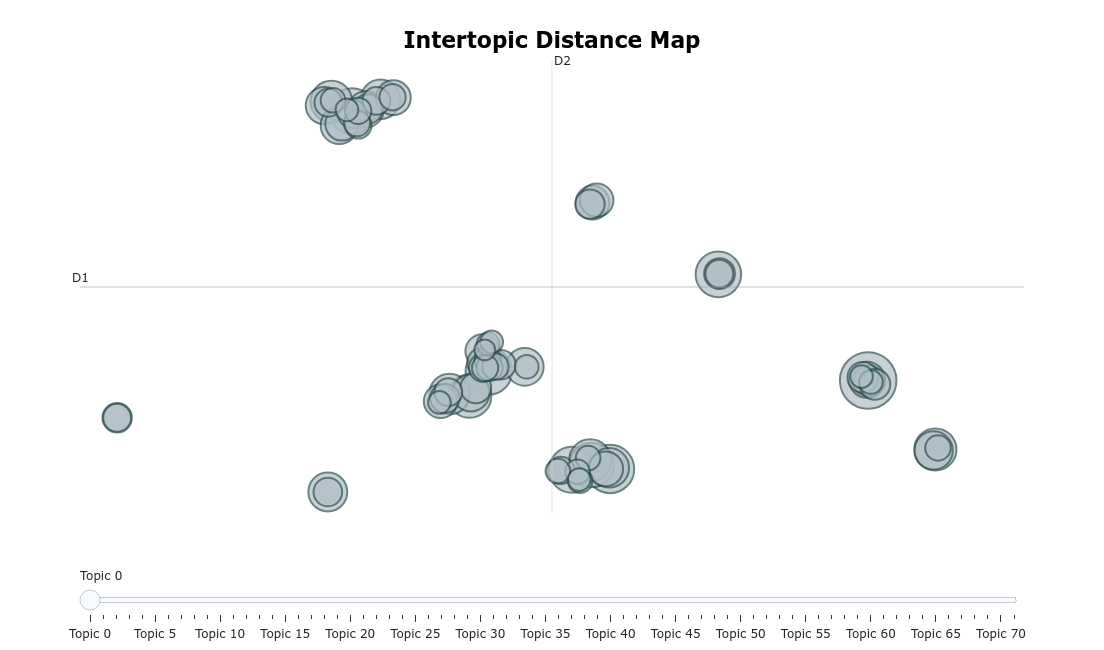

In [40]:
topic_model.visualize_topics()

In [41]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,386,-1_лекции_интересные_преподавательница_интересный,"[лекции, интересные, преподавательница, интере...",[Ужасно не понравился электив!!! Лекции были о...
1,0,74,0_преподавательница_интересные_интересный_преп...,"[преподавательница, интересные, интересный, пр...",[Электив замечательный! Преподаватель очень по...
2,1,54,1_лекции_психологии_лекций_теории,"[лекции, психологии, лекций, теории, социологи...",[Если вы хотите узнать как вести соц сети или ...
3,2,50,2_лекция_лекции_обсуждения_небольшие,"[лекция, лекции, обсуждения, небольшие, неинте...",[Название не соответствует сути модуля. Изучал...
4,3,49,3_лекции_занятий_интересные_преподаватель,"[лекции, занятий, интересные, преподаватель, п...",[В целом электив могу оценить как полезный. По...
...,...,...,...,...,...
68,67,12,67_интересные_преподаватели_художественной_тем...,"[интересные, преподаватели, художественной, те...","[Пары лучше не пропускать, но отработать всегд..."
69,68,12,68_преподавательница_интересная_интересные_пре...,"[преподавательница, интересная, интересные, пр...",[Будет интересно познавать язык. Большие данны...
70,69,12,69_интересные_семинары_семинарах_лекциях,"[интересные, семинары, семинарах, лекциях, тво...","[Очень интересный курс , помогает выработать ф..."
71,70,12,70_дискурс_абстрактная_полезностей_оригинальное,"[дискурс, абстрактная, полезностей, оригинальн...","[Название электива звучит скучно, но это далек..."
